<a href="https://colab.research.google.com/github/NayanaPradeep/Face-Emotion-Recognition/blob/main/facial_emotion_recogniton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROBLEM STATEMENT**

## PROJECT INTRODUCTION

The Indian education landscape has been undergoing rapid changes for the past 10 years owing to
the advancement of web-based learning services, specifically, eLearning platforms.

Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. India
is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market
is growing on a rapid scale, there are major challenges associated with digital learning when
compared with brick and mortar classrooms. One of many challenges is how to ensure quality
learning for students. Digital platforms might overpower physical classrooms in terms of content
quality but when it comes to understanding whether students are able to grasp the content in a live
class scenario is yet an open-end challenge.

In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the
class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who
need special attention. Digital classrooms are conducted via video telephony software program (exZoom) where it’s not possible for medium scale class (25-50) to see all students and access the
mood. Because of this drawback, students are not focusing on content due to lack of surveillance.
While digital platforms have limitations in terms of physical surveillance but it comes with the power of
data and machines which can work for you. It provides data in the form of video, audio, and texts
which can be analysed using deep learning algorithms. Deep learning backed system not only solves
the surveillance issue, but it also removes the human bias from the system, and all information is no
longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.


## PROBLEM STATEMENTS

We will solve the above-mentioned challenge by applying deep learning algorithms to live video data.
The solution to this problem is by recognizing facial emotions.

This is a few shot learning live face emotion detection system. The model should be able to real-time
identify the emotions of students in a live class

# **SOLUTION**

This notebook was generated in Kaggle environment .

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/facial-expression-recognitionferchallenge/Submission.csv
/kaggle/input/facial-expression-recognitionferchallenge/fer2013/fer2013/README
/kaggle/input/facial-expression-recognitionferchallenge/fer2013/fer2013/fer2013.bib
/kaggle/input/facial-expression-recognitionferchallenge/fer2013/fer2013/fer2013.csv


In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf

## Importing libraries

In [ ]:
#importing all the necessary libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model
from keras.utils import np_utils
from tensorflow.keras.regularizers import l2

## Reading the dataset

Dataset Link-https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data

In [ ]:
fer_df=pd.read_csv('/kaggle/input/facial-expression-recognitionferchallenge/fer2013/fer2013/fer2013.csv')

In [ ]:
fer_df.shape

(35887, 3)

## Exploratory Data Analysis

In [ ]:
#top 5 rows of the dataset
fer_df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
#last 5 rows of the dataset
fer_df.tail()

,emotion,pixels,Usage
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest
35886,2,19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...,PrivateTest


Here the data is not in image format.The pixels column of the data-frame contains all the pixel values. There total 96 pixel values associated with each image because each image is grey-scaled and of resolution 48x48. This format is known as data-frame. 

In [ ]:
#unique emotion id 
fer_df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

In [ ]:
#unique usage types
fer_df.Usage.unique()

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

In [ ]:
#understand the attributes of the dataset
fer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [ ]:
#no of records per emotion
fer_df.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [ ]:
#types of emotions
emotions = ('anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise', 'neutral')

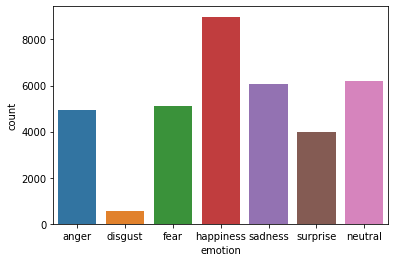

In [ ]:
#bargraph for the emotions
sns.countplot(x=fer_df['emotion'])
plt.xticks(range(7), emotions);

The dataset has very less number of images for the disgust emotion.
This can cause some discrepancy in the output model

## Data Transformation

In order to provide the input as 48x48x1 gray-scaled images, we need to transform the current data

In [ ]:
#  changing the pixels to numpy array
X = fer_df['pixels'].apply(lambda x: np.array(x.split()).reshape(48, 48, 1).astype('float32'))
X = np.stack(X, axis=0)
X.shape

(35887, 48, 48, 1)

Above code converted each flattened image into a square 3 dimensional image of size 48x48x1 and stacked all those images along the 4th dimension because we feed data as batches to our model rather than feeding one image at a time.Since this is a grey-scaled image, there is only a single channel.
 
Now that the images(X) are ready let's transform the labels(emotions) as well.

In [ ]:
y = fer_df['emotion']
y.shape

(35887,)

Text(0.5, 1.0, 'anger')

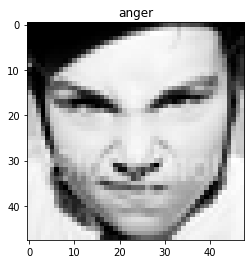

In [ ]:
#display a random image and it emotion
plt.imshow(X[2103].reshape((48,48)), cmap='gray')
plt.title(emotions[y[2103]])

Text(0.5, 1.0, 'happiness')

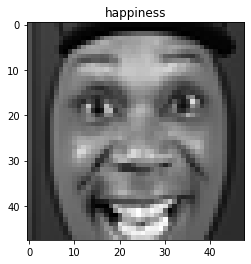

In [ ]:
#display a random image and it emotion
plt.imshow(X[6052].reshape((48,48)), cmap='gray')
plt.title(emotions[y[6052]])

In [ ]:
# Label encoding the emotions
le = LabelEncoder()
img_labels = le.fit_transform(y)
img_labels = np_utils.to_categorical(img_labels)
img_labels.shape

(35887, 7)

In [ ]:
#current image value
np.max(X)

255.0

In [ ]:
# dividing the image value by 255.0 so that all values can be filled between 0.0 and 1
X = X / 255.0

Normalizing the image arrays is important because neural networks are highly sensitive to non-normalized data.
For these gray-scaled images min=0, max=255 therefore we will divide the array by 255. This is min-max normalization.


In [ ]:
#changed image value
np.max(X)

1.0

## Splitting Data into train and test sets

In [ ]:
#splitting the dataset to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, img_labels, test_size=0.1, stratify=img_labels)
print('Training set : ', y_train.shape[0])
print('Test set : ', y_test.shape[0])

Training set :  32298
Test set :  3589


In [ ]:
# creating images for increasing data

gen = ImageDataGenerator(
    rotation_range = 15,
    width_shift_range = 0.15,
    height_shift_range = 0.15,
    shear_range = 0.15,
    zoom_range = 0.15,
    horizontal_flip = True
)
gen.fit(X_train)

## CUSTOM CNN MODEL 1

In [ ]:
model1 = Sequential()

# 1st Convolutional Layer
model1.add(Conv2D(64,(5,5), padding='same', input_shape=(48, 48,1),activation='elu',kernel_initializer='he_normal'))
model1.add(BatchNormalization())


model1.add(Conv2D(64,(5,5), padding='same',activation='elu',kernel_initializer='he_normal'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.4))

model1.add(Conv2D(filters=128,kernel_size=(3,3),activation='elu',padding='same',kernel_initializer='he_normal'))
model1.add(BatchNormalization())
    
model1.add(Conv2D(filters=128,kernel_size=(3,3),activation='elu',padding='same',kernel_initializer='he_normal'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.4))

model1.add(Conv2D(filters=256,kernel_size=(3,3),activation='elu',padding='same',kernel_initializer='he_normal'))
model1.add(BatchNormalization())
    
model1.add(Conv2D(filters=256,kernel_size=(3,3),activation='elu',padding='same',kernel_initializer='he_normal'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.4))

model1.add(Flatten(name='flatten'))
        
model1.add(Dense(128,activation='elu',kernel_initializer='he_normal'))
model1.add(BatchNormalization())
model1.add(Dropout(0.4))
    
model1.add(Dense(7,activation='softmax'))
    


In [ ]:
# compile the model
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        1664      
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       7

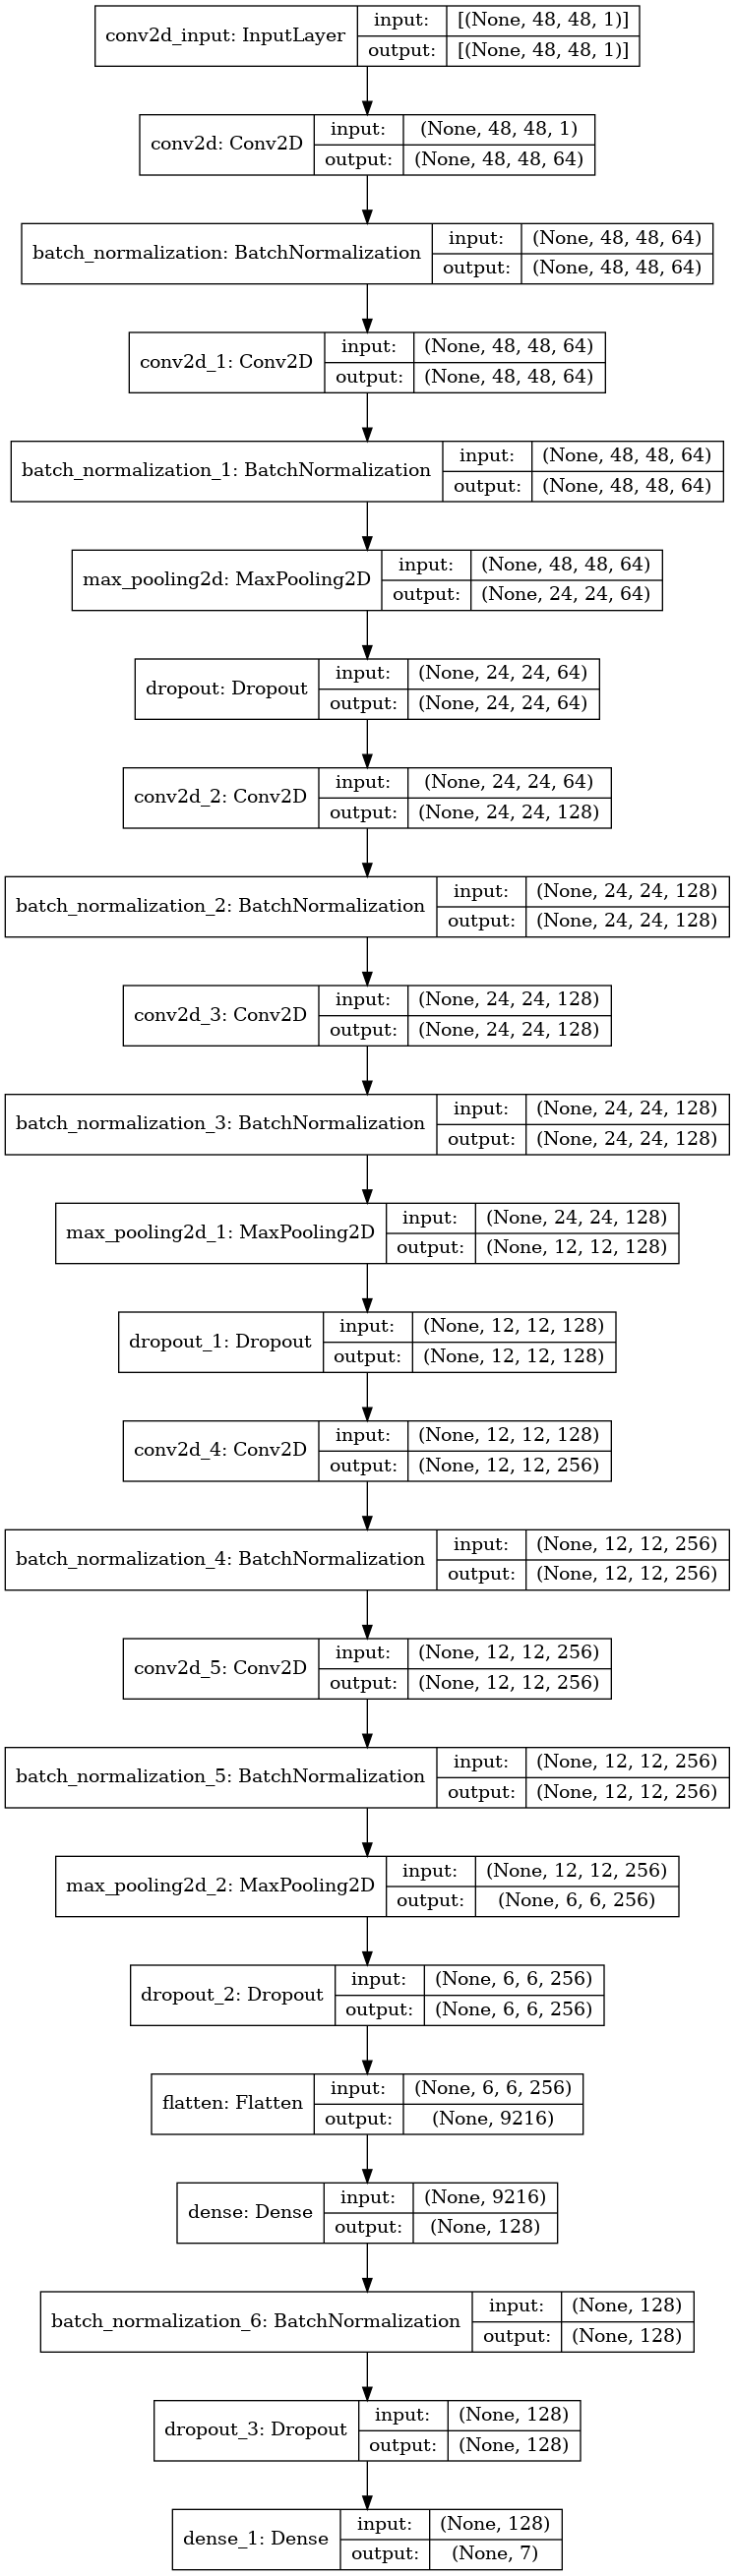

In [ ]:
#Visualizing the model
plot_model(model1,show_shapes=True, show_layer_names=True, expand_nested=True, to_file='/kaggle/working/model1.png')

In [ ]:
# training the model
# function for early stopping in when change in accuracy is low and ReduceLROnPlateau for learning rate

early_stopping = EarlyStopping(monitor='val_accuracy',min_delta=0.00005,patience=11,verbose=1,restore_best_weights=True,)
lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy',factor=0.5,patience=7,min_lr=1e-7,verbose=1,)
callbacks = [early_stopping,lr_scheduler,]

In [ ]:
history_m1 = model1.fit(
      gen.flow(X_train, y_train, batch_size=32),
      validation_data = (X_test, y_test),
      steps_per_epoch = len(X_train) / 32,
      epochs = 100,
      callbacks = callbacks 
)

Epoch 1/100
1009/1009 [==============================] - 29s 21ms/step - loss: 1.9297 - accuracy: 0.2605 - val_loss: 1.6711 - val_accuracy: 0.3185
Epoch 2/100
1009/1009 [==============================] - 21s 21ms/step - loss: 1.5831 - accuracy: 0.3816 - val_loss: 1.4173 - val_accuracy: 0.4622
Epoch 3/100
1009/1009 [==============================] - 21s 21ms/step - loss: 1.4154 - accuracy: 0.4564 - val_loss: 1.2626 - val_accuracy: 0.5185
Epoch 4/100
1009/1009 [==============================] - 21s 21ms/step - loss: 1.3350 - accuracy: 0.4914 - val_loss: 1.2245 - val_accuracy: 0.5408
Epoch 5/100
1009/1009 [==============================] - 21s 21ms/step - loss: 1.2729 - accuracy: 0.5156 - val_loss: 1.1452 - val_accuracy: 0.5712
Epoch 6/100
1009/1009 [==============================] - 21s 21ms/step - loss: 1.2307 - accuracy: 0.5345 - val_loss: 1.1235 - val_accuracy: 0.5848
Epoch 7/100
1009/1009 [==============================] - 21s 21ms/step - loss: 1.1970 - accuracy: 0.5473 - val_loss: 1

In [ ]:
model_json = model1.to_json()
with open("/kaggle/working/model1.json", "w") as json_file:
    json_file.write(model_json)
    
model1.save("/kaggle/working/model1.h5")

In [ ]:
predictions = model1.predict(X_test)
print(classification_report(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1)))

              precision    recall  f1-score   support

           0       0.60      0.67      0.63       495
           1       0.94      0.58      0.72        55
           2       0.61      0.47      0.53       512
           3       0.89      0.89      0.89       899
           4       0.63      0.55      0.59       608
           5       0.79      0.85      0.82       400
           6       0.62      0.74      0.68       620

    accuracy                           0.71      3589
   macro avg       0.73      0.68      0.69      3589
weighted avg       0.71      0.71      0.71      3589



<AxesSubplot:>

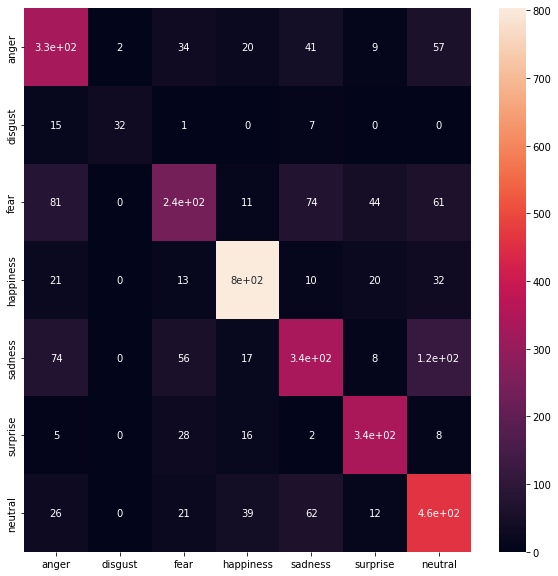

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1)),
            xticklabels = emotions,
            yticklabels = emotions,
            annot = True
)

In [ ]:
# Show scores on X_test,Y_test
scores = model1.evaluate(X_test,y_test)
print("Loss: " + str(scores[0]))
print("Accuracy: " + str(scores[1]))

113/113 [==============================] - 1s 6ms/step - loss: 0.8658 - accuracy: 0.7088
Loss: 0.8657575249671936
Accuracy: 0.7088325619697571


In [ ]:
# Show scores on X_train,Y_train
scores = model1.evaluate(X_train,y_train)
print("Loss: " + str(scores[0]))
print("Accuracy: " + str(scores[1]))

1010/1010 [==============================] - 6s 6ms/step - loss: 0.5680 - accuracy: 0.7896
Loss: 0.5679876208305359
Accuracy: 0.7896154522895813


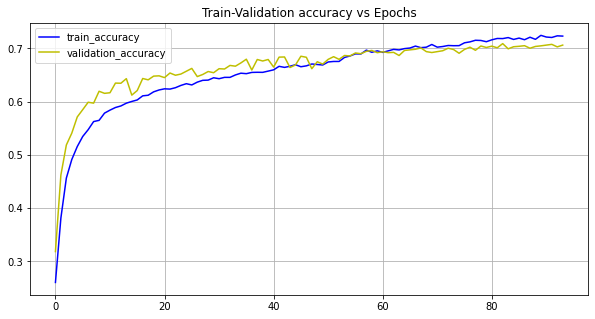

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history_m1.history['accuracy'], 'b', label='train_accuracy')
plt.plot(history_m1.history['val_accuracy'], 'y', label='validation_accuracy')
plt.legend()
plt.title("Train-Validation accuracy vs Epochs")
plt.grid(True)

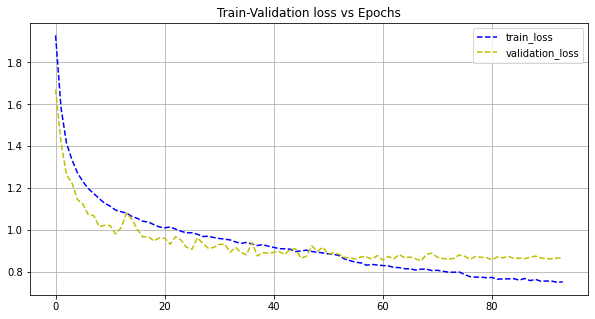

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history_m1.history['loss'], 'b--', label='train_loss')
plt.plot(history_m1.history['val_loss'], 'y--', label='validation_loss')
plt.legend()
plt.title("Train-Validation loss vs Epochs")
plt.grid(True)

The training gave the accuracy of 79% and val_accuracy of 71%.First model looks promising.

Let's try one more custom tained model an evaluate it.

##  CUSTOM CNN Model 2

In [ ]:
# Initialising the CNN
model2 = Sequential()

# 1st Convolutional Layer
model2.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.35))

# 2nd Convolutional layer
model2.add(Conv2D(128,(5,5), padding='same'))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.35))

# 3rd Convolutional layer
model2.add(Conv2D(512,(3,3), padding='same') )
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.35))

# 4th Convolutional layer
model2.add(Conv2D(512,(3,3), padding='same'))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.35))

# Flattening
model2.add(Flatten())

# 1st Fully connected layer 
model2.add(Dense(256))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.35))

# 2nd Fully connected layer
model2.add(Dense(512))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.35))

model2.add(Dense(7, activation='softmax'))


In [ ]:
# compile the model
model2.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_7 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_8 (Batch (None, 24, 24, 128)      

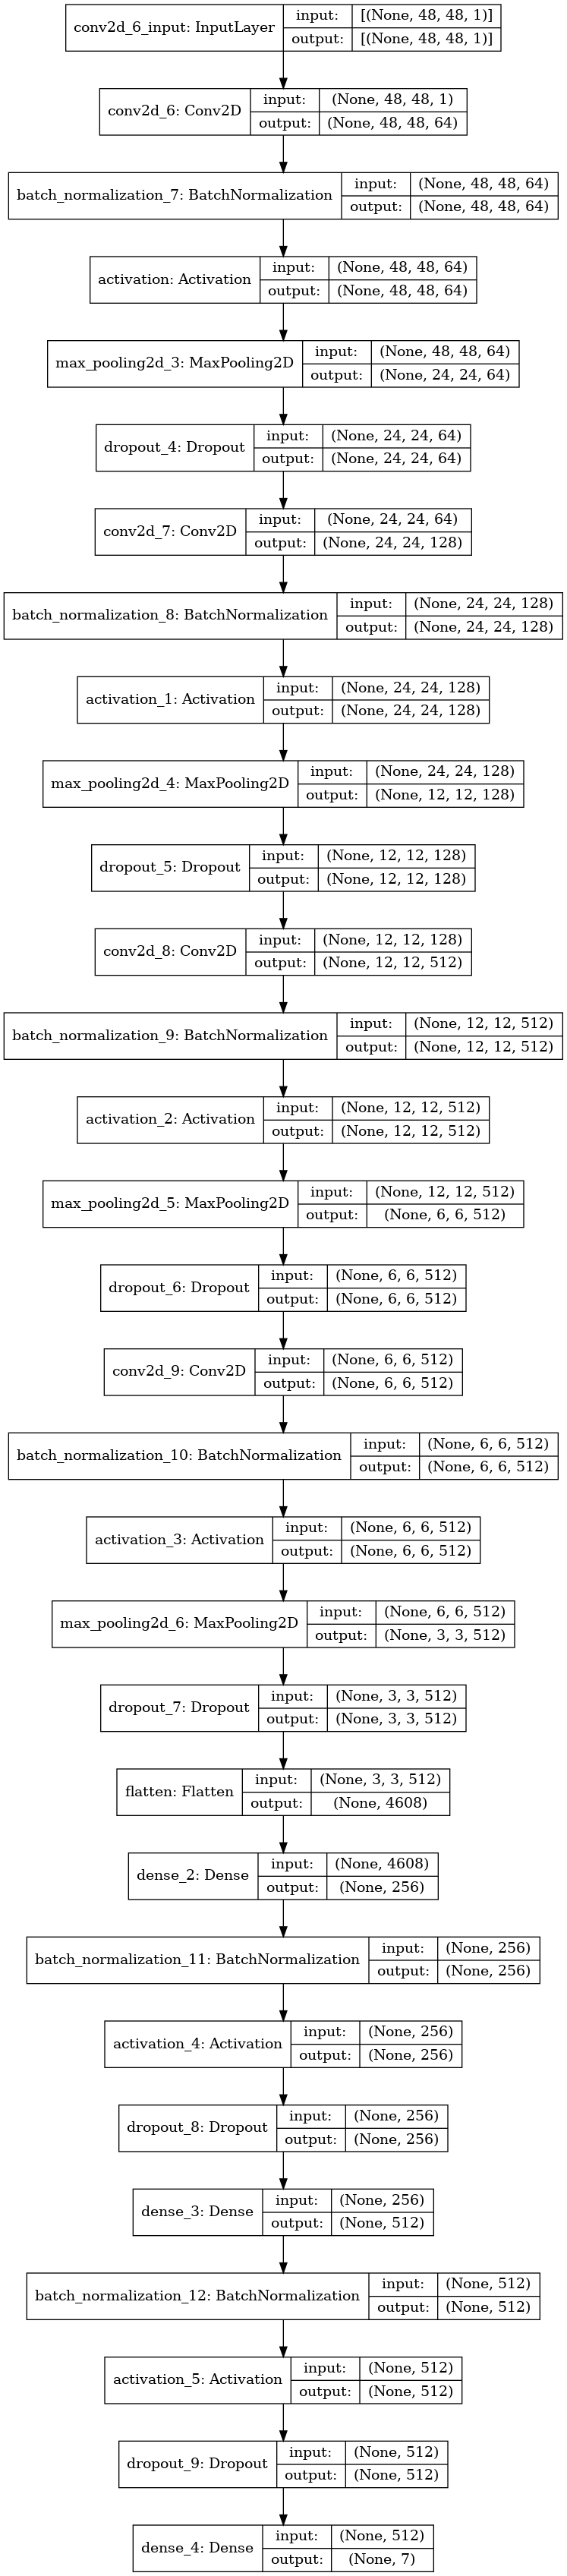

In [ ]:
#Visualizing the model
plot_model(model2,show_shapes=True, show_layer_names=True, expand_nested=True, to_file='/kaggle/working/model2.png')

In [ ]:
history_m2 = model2.fit(
      gen.flow(X_train, y_train, batch_size=32),
      validation_data = (X_test, y_test),
      steps_per_epoch = len(X_train) / 32,
      epochs = 100,
      callbacks = callbacks 
)

Epoch 1/100
1009/1009 [==============================] - 22s 21ms/step - loss: 1.9036 - accuracy: 0.2458 - val_loss: 1.7230 - val_accuracy: 0.2970
Epoch 2/100
1009/1009 [==============================] - 21s 20ms/step - loss: 1.6640 - accuracy: 0.3404 - val_loss: 1.7354 - val_accuracy: 0.2499
Epoch 3/100
1009/1009 [==============================] - 20s 20ms/step - loss: 1.5059 - accuracy: 0.4127 - val_loss: 1.4251 - val_accuracy: 0.4528
Epoch 4/100
1009/1009 [==============================] - 21s 20ms/step - loss: 1.4182 - accuracy: 0.4544 - val_loss: 1.3185 - val_accuracy: 0.4935
Epoch 5/100
1009/1009 [==============================] - 21s 21ms/step - loss: 1.3634 - accuracy: 0.4772 - val_loss: 1.3857 - val_accuracy: 0.4687
Epoch 6/100
1009/1009 [==============================] - 21s 21ms/step - loss: 1.3352 - accuracy: 0.4902 - val_loss: 1.2056 - val_accuracy: 0.5313
Epoch 7/100
1009/1009 [==============================] - 21s 21ms/step - loss: 1.3047 - accuracy: 0.5057 - val_loss: 1

In [ ]:
model_json = model2.to_json()
with open("/kaggle/working/model2.json", "w") as json_file:
    json_file.write(model_json)
    
model2.save("/kaggle/working/model2.h5")

In [ ]:
predictions = model2.predict(X_test)
print(classification_report(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1)))

              precision    recall  f1-score   support

           0       0.65      0.57      0.61       495
           1       0.69      0.49      0.57        55
           2       0.61      0.36      0.46       512
           3       0.85      0.91      0.88       899
           4       0.59      0.56      0.57       608
           5       0.75      0.81      0.78       400
           6       0.54      0.75      0.63       620

    accuracy                           0.68      3589
   macro avg       0.67      0.64      0.64      3589
weighted avg       0.68      0.68      0.67      3589



<AxesSubplot:>

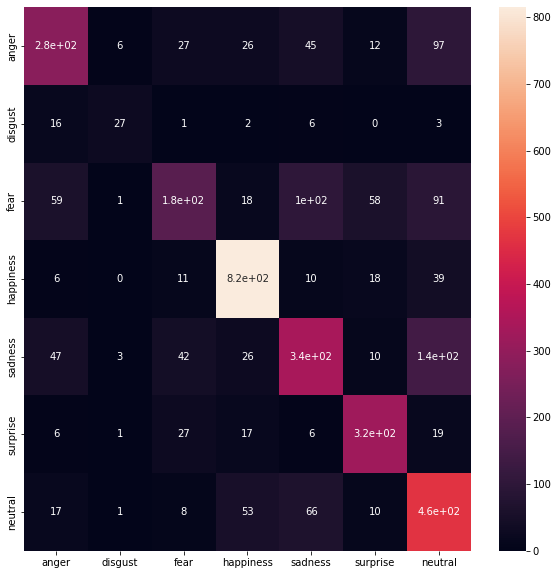

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1)),
            xticklabels = emotions,
            yticklabels = emotions,
            annot = True
)

In [ ]:
# Show scores on X_test,Y_test
scores = model2.evaluate(X_test,y_test)
print("Loss: " + str(scores[0]))
print("Accuracy: " + str(scores[1]))

113/113 [==============================] - 1s 6ms/step - loss: 0.8671 - accuracy: 0.6790
Loss: 0.8670587539672852
Accuracy: 0.6790192127227783


In [ ]:
# Show scores on X_train,Y_train
scores = model2.evaluate(X_train,y_train)
print("Loss: " + str(scores[0]))
print("Accuracy: " + str(scores[1]))

1010/1010 [==============================] - 5s 5ms/step - loss: 0.7468 - accuracy: 0.7179
Loss: 0.746849000453949
Accuracy: 0.7179391980171204


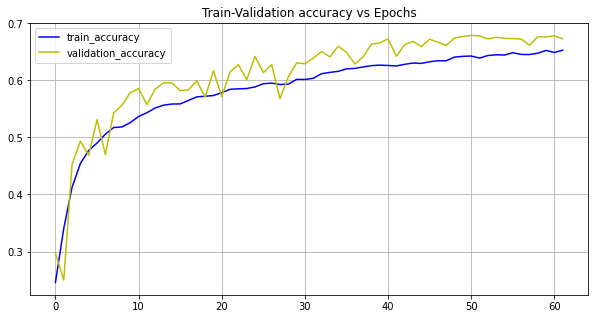

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history_m2.history['accuracy'], 'b', label='train_accuracy')
plt.plot(history_m2.history['val_accuracy'], 'y', label='validation_accuracy')
plt.legend()
plt.title("Train-Validation accuracy vs Epochs")
plt.grid(True)

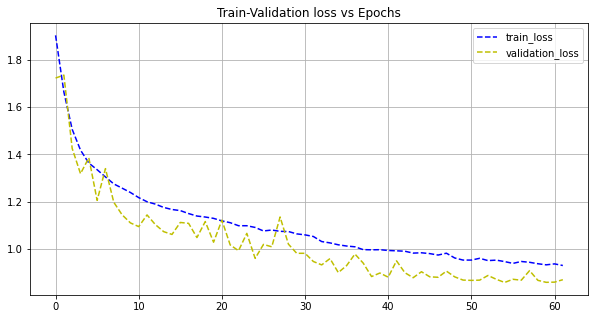

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history_m2.history['loss'], 'b--', label='train_loss')
plt.plot(history_m2.history['val_loss'], 'y--', label='validation_loss')
plt.legend()
plt.title("Train-Validation loss vs Epochs")
plt.grid(True)

The training gave the accuracy of 72% and val_accuracy of 68%.  

Model 1 is clearly the winner.


# CONCLUSION



*   Two models are trained in this notebook.

*   First model is trained with 'elu' activation function and second one is trained with 'relu' activation function

*   Model1 gave 79 and 71 percentage accuaracy for training and validation respectively

*   Model2 gave 72 and 68 percentage accuracy for traiing and validation respectively.

*   Callback functions are used for optimising the training progress for both the models


*   Model 1 is saved and will be used for the emotion recognition app.
Model1 was giving promising results when tested in local environment under proper light.

In [ ]:
#  Submitted by Nayana Pradeep